In [9]:
import numpy as np
import os,tqdm
import os
import sys
sys.path.append('/home/ash/deeplab/')
import numpy as np
from PIL import Image
from torch.utils import data
import torch
from torchvision import transforms


# 数据集异常


In [84]:
hash

<function hash(obj, /)>

# img

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import cv2

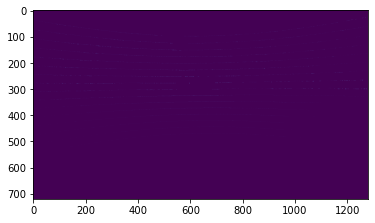

In [81]:
# 
input_path = r'F:\Small_Obstacle_Dataset\train\file_2\depth\0000000012.png'
a = np.asarray(Image.open(input_path))
b = a[:,:]
plt.imshow(b)

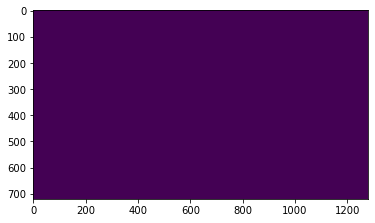

In [392]:
# 
input_path = r'F:\Small_Obstacle_Dataset\train\file_2\image\0000000012.png'
a = np.asarray(Image.open(input_path))
b = a[:,:,3]
plt.imshow(b)

In [59]:
a.dtype

dtype('uint8')

In [56]:
y =a.copy()
mask = y!=0.2312
labels = y[mask].astype(np.uint8)
# np.bincount()巧妙计算覆盖量 每个label有多少像素
count_l = np.bincount(labels)
count_l

array([ 14000,  14582,  25076,  23565,  36251,  44587,  48375,  59194,
        62298,  59762,  54325,  49533,  46007,  43512,  40280,  38868,
        35809,  33221,  31328,  29339,  27267,  26134,  25814,  24957,
        23919,  23860,  24272,  24129,  24409,  24132,  23610,  24659,
        26466,  28169,  29952,  31061,  31943,  33527,  31223,  27813,
        26039,  23214,  21530,  20055,  19039,  18894,  18314,  17114,
        17083,  16731,  16662,  16236,  16492,  16382,  16193,  15700,
        15321,  15323,  15124,  14894,  14945,  14741,  14543,  14666,
        14810,  14893,  14791,  14892,  14617,  14445,  13965,  13583,
        13080,  12685,  12541,  11941,  11476,  11125,  10791,  10270,
         9627,   9052,   8338,   7874,   7761,   7409,   7069,   6773,
         6522,   6185,   5981,   5829,   5789,   5602,   5320,   5342,
         5319,   5228,   5191,   5102,   4973,   5109,   5079,   5010,
         5101,   5140,   5207,   5272,   5116,   5083,   4950,   4930,
      

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(input_path)
img.shape

(720, 1280, 3)

In [65]:
img = img[:,:,3]

IndexError: index 3 is out of bounds for axis 2 with size 3

In [62]:
type(img)

numpy.ndarray

<ipython-input-73-b8dc7f34fd34>:9: RuntimeWarning: invalid value encountered in true_divide
  cdf_normalized = cdf * hist.max()/ cdf.max()


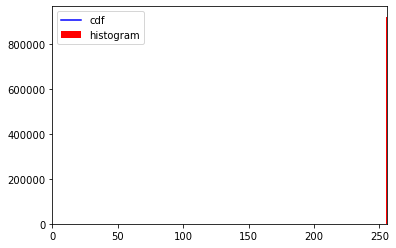

In [73]:
#flatten() 将数组变成一维
img = b.copy()

hist,bins = np.histogram(img.flatten(),256,[0,256])
hist[-1]=0
bins[-1]=0
# 计算累积分布图
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [77]:
img = b.copy()

hist,bins = np.histogram(img.flatten(),256,[0,256])
hist

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [78]:
1280*720


921600

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = b

equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
#stacking images side-by-side
cv2.imshow('img',res)
cv2.waitKey()
cv2.destroyAllWindows()

# lidar

In [92]:
f = np.load(velodyne,allow_pickle=True)

In [91]:
f

array([list([0.04971501976251602, -0.1092105582356453, 0.5390450954437256]),
       list([-0.003957742488957136, -0.007414938575864327, -0.014900416353880402, 0.9998536555680477])],
      dtype=object)

In [38]:
root_path = r'F:\Small_Obstacle_Dataset\train\file_2\velodyne'
folders=os.listdir(root_path)
folders

['0000000000.npy',
 '0000000001.npy',
 '0000000002.npy',
 '0000000003.npy',
 '0000000004.npy',
 '0000000005.npy',
 '0000000006.npy',
 '0000000007.npy',
 '0000000008.npy',
 '0000000009.npy',
 '0000000010.npy',
 '0000000011.npy',
 '0000000012.npy',
 '0000000013.npy',
 '0000000014.npy',
 '0000000015.npy',
 '0000000016.npy',
 '0000000017.npy',
 '0000000018.npy',
 '0000000019.npy',
 '0000000020.npy',
 '0000000021.npy',
 '0000000022.npy',
 '0000000023.npy',
 '0000000024.npy',
 '0000000025.npy',
 '0000000026.npy',
 '0000000027.npy',
 '0000000028.npy',
 '0000000029.npy',
 '0000000030.npy',
 '0000000031.npy',
 '0000000032.npy',
 '0000000033.npy',
 '0000000034.npy',
 '0000000035.npy',
 '0000000036.npy',
 '0000000037.npy',
 '0000000038.npy',
 '0000000039.npy',
 '0000000040.npy',
 '0000000041.npy',
 '0000000042.npy',
 '0000000043.npy',
 '0000000044.npy',
 '0000000045.npy',
 '0000000046.npy',
 '0000000047.npy',
 '0000000048.npy',
 '0000000049.npy',
 '0000000050.npy',
 '0000000051.npy',
 '0000000052

In [589]:
imgs = []
for f in folders:
    #print(f)
    seg_path = os.path.join(root_path, f)
    print(seg_path)
    img = np.load(seg_path,allow_pickle=True)
    imgs.append(img)

F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000000.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000001.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000002.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000003.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000004.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000005.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000006.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000007.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000008.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000009.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000010.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000011.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000012.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000013.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000014.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000

F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000153.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000154.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000155.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000156.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000157.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000158.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000159.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000160.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000161.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000162.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000163.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000164.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000165.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000166.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000167.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000

F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000318.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000319.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000320.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000321.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000322.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000323.npy
F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000324.npy


imgs

for i in imgs:
    print(i.shape)

In [510]:
np.dot(Intrinsics, LIDAR_Camera_Extrinsics).shape

(3, 4)

In [468]:
np.column_stack((a[:, 0:3],np.ones(a.shape[0]))).shape

(21218, 4)

In [461]:
a.shape

(21218, 5)

In [454]:
a[:,2:3].shape

(21218, 0)

In [512]:
a[:,2:3]

array([[0.15041519],
       [0.60038903],
       [0.65770304],
       ...,
       [1.78814105],
       [0.19818565],
       [1.38495096]])

In [590]:
a=imgs[55]
a[:,0:3]
np.savetxt( 'aframe_re.txt',a)

### 先乘，再归一，再乘

In [602]:
# 防止像素走向不对，需要乘一个
LIDAR_Rotate = [0,-1,0,0,0,-1,1,0,0]
LIDAR_Rotate = np.array(LIDAR_Rotate).reshape(3,3)
LIDAR_Rotate

array([[ 0, -1,  0],
       [ 0,  0, -1],
       [ 1,  0,  0]])

In [582]:
LIDAR_Camera_Extrinsics

array([[ 9.99959732e-01,  8.89502726e-03, -1.18871856e-03,
         2.64077038e-01],
       [-8.94883951e-03,  9.98290513e-01, -5.77578558e-02,
        -4.08350639e-02],
       [ 6.72928760e-04,  5.77661677e-02,  9.98329914e-01,
         8.56414624e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [ ]:
a=np.array((2,3,4,1,5,6,7,1))
a=a.reshape(2,4)

In [603]:
a = imgs[66].copy()
a.shape

(21992, 5)

In [607]:
a[:,0:3].shape

(21992, 3)

In [605]:
a[:,0:3].dot(LIDAR_Rotate)

array([[  0.52817965,  29.7536602 ,  -5.50913715],
       [  1.50999713,  28.32907486,  -5.25559807],
       [  2.98473549,  33.54006958,  -6.24050617],
       ...,
       [  4.94622374, -14.9899025 , -15.30718327],
       [ -0.08293384,  -3.32488632,  -3.39407706],
       [  3.17260385,  -8.28718567,  -8.45669556]])

In [608]:
# 防止像素走向不对，需要乘一个axis rotate
a[:,0:3] = LIDAR_Rotate.dot(a[:,0:3].T).T

In [609]:
# 雷达目标在摄像头坐标系下的坐标 
# [4*4].T * [2*4].T
tmp = np.dot(LIDAR_Camera_Extrinsics, np.column_stack((a[:, 0:3],np.ones(a.shape[0]))).T).T
tmp.shape

(21992, 4)

In [610]:
thistmp = tmp[:,0:2]/tmp[:,2:3]
thistmp

array([[ 0.17538627, -0.04035356],
       [ 0.17525991, -0.00475982],
       [ 0.17719121,  0.03053064],
       ...,
       [-1.0290854 , -0.38885658],
       [-0.94075001, -0.03594406],
       [-1.01697773, -0.44618934]])

In [611]:
# 归一化摄像头坐标系坐标
thistmp=np.column_stack((thistmp,np.ones(thistmp.shape[0])))
thistmp

array([[ 0.17538627, -0.04035356,  1.        ],
       [ 0.17525991, -0.00475982,  1.        ],
       [ 0.17719121,  0.03053064,  1.        ],
       ...,
       [-1.0290854 , -0.38885658,  1.        ],
       [-0.94075001, -0.03594406,  1.        ],
       [-1.01697773, -0.44618934,  1.        ]])

In [579]:
Intrinsics[:,0:3]

array([[692.653256,   0.      , 629.321381],
       [  0.      , 692.653256, 330.685425],
       [  0.      ,   0.      ,   1.      ]])

In [612]:
#thistmp.dot(Intrinsics)
#(3, 21218)
a[:,0:3] = Intrinsics[:,0:3].dot(thistmp.T).T
# x,y,z
a[:,0:3]

array([[750.80325249, 302.73439842,   1.        ],
       [750.71573123, 327.38852267,   1.        ],
       [752.05344795, 351.83257298,   1.        ],
       ...,
       [-83.47797045,  61.34264707,   1.        ],
       [-22.29217989, 305.78865478,   1.        ],
       [-75.09155649,  21.63092454,   1.        ]])

In [635]:
# 检查有多少点满足要求
h = a[:,0]<=1280
k = a[:,0]>=0
y = a[:,1]<=720
u = a[:,1]>=0
print(a.size)
(h*k*y*u)

109960


array([ True,  True,  True, ..., False, False, False])

### 结果看上去不错，可视化一下

In [636]:
filted = a[:,0:2][(h*k*y*u)]
filted[:,0]

array([750.80325249, 750.71573123, 752.05344795, ..., 929.10771857,
       917.05308602, 952.42470755])

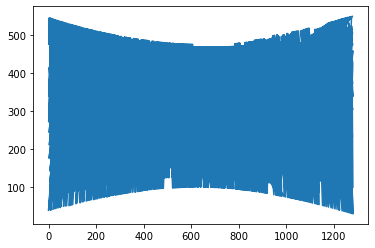

In [637]:
plt.figure()
plt.plot(filted[:,0],filted[:,1])

(720, 1280, 4)

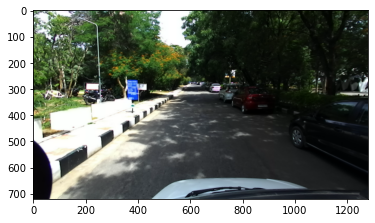

In [630]:
pic = np.asarray(Image.open(image))
b = imgs[5]
plt.imshow(pic)
pic.shape

### 成完了再归一

In [ ]:
np.dot(LIDAR_Camera_Extrinsics, np.column_stack((a[:, 0:3],np.ones(a.shape[0]))).T)
a[:, 0:3] = np.dot(np.dot(Intrinsics, LIDAR_Camera_Extrinsics), 
                   np.column_stack((a[:, 0:3],np.ones(a.shape[0]))).T).T

In [507]:
a=imgs[199]
#np.ones(a.shape[0])
#tmp = np.column_stack((a[:, 0:3],np.ones(a.shape[0])))
a[:, 0:3] = np.dot(np.dot(Intrinsics, LIDAR_Camera_Extrinsics), 
                   np.column_stack((a[:, 0:3],np.ones(a.shape[0]))).T).T
# 不然不能广播
a[:,0:2] = a[:,0:2] / a[:,2:3]

# 检查有多少点满足要求
h = a[:,0]<=1280
k = a[:,0]>=0
y = a[:,1]<=720
u = a[:,1]>=0
(h*k*y*u).sum()

0

0

In [496]:
a[:,0]<=1280

array([ True, False, False, ..., False, False, False])

### 按照教程
extrincsAdcRadarRelCam=[
0.999745,0.004500,-0.020897,-0.300000;
-0.004867,0.999900,-0.017354,0.700000;
0.020896,0.017600,0.999645,1.200000;
0.000000,0.000000,0.000000,1.000000;] %雷达和摄像头朝向都是右x，前z，下y

extrincsCfarRadarRelCam=[
0.999622,0.004500,-0.026132,-0.080000;
-0.004958,0.999900,-0.017328,0.900000;
0.026130,0.017600,0.999522,1.200000;
0.000000,0.000000,0.000000,1.000000;]%雷达和摄像头朝向都是右x，前z，下y

intrincs=[1456.0,0,660.0;
0,1470.0,359.0;
0,0,1] %1456.0为fx，660.0为cx，1470.0为fy，359.0为cy

posRadar=zeros(4,1);
posRadar(1,1)=posX;%雷达返回的目标朝右的数值
posRadar(2,1)=0;%雷达返回的目标高度向数值为0
posRadar(3,1)=posZ;%雷达返回的目标纵向数值
posRadar(4,1)=1.0;%齐次对齐
camPos=zeros(4,1);
camPos=extrincsAdcRadarRelCam*posRadar;%雷达目标在摄像头坐标系下的坐标 

camPosNorm=camPos(1:3,1)/camPos(3,1); %归一化摄像头坐标系坐标
UVZ=intrincs*camPosNorm;
%UVZ=intrincs*camPos(1:3,1);

U=UVZ(1,1); %目标的图像横坐标
V=UVZ(2,1);%目标的图像纵坐标系


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
将标注真值转到激光坐标系下的矩阵：
-0.9988   -0.0023    0.0490    0.0295
   -0.0489   -0.0493   -0.9976   -2.2613
    0.0047   -0.9989    0.0489   -0.0462
         0         0         0    1.0000 
这个是标注真值相对于激光雷达坐标系的值，需将真值中的y值置零，
计算出来的激光雷达朝左为x，朝后为y 

标注真值与激光坐标系下的目标位置不太一致，存在一个旋转角度的差异


In [540]:
a=np.array((2,3,4,1,5,6,7,1))
a=a.reshape(2,4)
a
# 2*4

array([[2, 3, 4, 1],
       [5, 6, 7, 1]])

In [ ]:
camPos = 

# 检测代码

In [421]:
a = imgs[5]
# 点云投影到平面
tmp = np.column_stack((a[:, 0:3],np.ones(a.shape[0])))
pixel = np.dot(np.dot(Intrinsics, LIDAR_Camera_Extrinsics), tmp)
print(pixel)
pixel = pixel[0:2] / pixel[2]
pixel = pixel.astype(int)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 21218 and the array at index 1 has size 1

In [423]:
np.ones_like(a.shape)

array([1, 1])

In [419]:
# 汇总
for a in imgs:
    # 点云投影到平面
    tmp = np.column_stack((a[:, 0:3],np.ones_like(a.shape[0])))
    pixel = np.dot(np.dot(Intrinsics, LIDAR_Camera_Extrinsics), a[:, 0:3])
    print(pixel)
    pixel = pixel[0:2] / pixel[2]
    pixel = pixel.astype(int)

TypeError: string indices must be integers

## 获取16条线上的点

In [638]:
# 获取其中一帧
a = imgs[44]
a

array([[  5.87901735,   2.10846663,  -1.6735239 ,   2.        ,
          0.        ],
       [ 16.23962784,   5.82102585,   0.30112383,   1.        ,
          8.        ],
       [  6.78239202,   2.42978764,  -1.66328812,   2.        ,
          1.        ],
       ...,
       [ -1.56012022,  -6.07187033,   1.44733512,   9.        ,
         14.        ],
       [ -4.00276423, -15.56717396,  -0.28056487,   1.        ,
          7.        ],
       [ -4.45016956, -17.29466629,   4.78504658,   8.        ,
         15.        ]])

In [639]:
a.shape

(22408, 5)

In [640]:
x = a[:,0]
y = a[:,1]
k = x/y
thetas = np.arctan(k)
thetas

<ipython-input-640-5eccdf46329b>:3: RuntimeWarning: divide by zero encountered in true_divide
  k = x/y


array([1.22644285, 1.22661734, 1.22679139, ..., 0.25150183, 0.25167651,
       0.25185103])

In [641]:
a[:,0]

array([ 5.87901735, 16.23962784,  6.78239202, ..., -1.56012022,
       -4.00276423, -4.45016956])

In [642]:
# array拼接
# 5 角度（弧度制）
a = np.column_stack((a,thetas))
a.shape

(22408, 6)

In [643]:
# 注意 这里的距离不一定是L2的 作者没说
# 6 距离
dis = np.linalg.norm(a[:,0:2],axis=1,keepdims=True, ord=2)
a = np.column_stack((a,dis))
a.shape

(22408, 7)

In [644]:
# 7 是否跳变点 0不是 1正 -1负 2异常
a = np.column_stack((a,np.zeros_like(a[:,0])))
a.shape

(22408, 8)

In [645]:
# 8 是否障碍物点 0不是 1正 -1负 2异常
a = np.column_stack((a,np.zeros_like(a[:,0])))
a.shape

(22408, 9)

In [650]:
mask = a[:,8] ==-1
mask.sum()

0

In [646]:
dis

array([[ 6.24567663],
       [17.25137253],
       [ 7.20449232],
       ...,
       [ 6.26909757],
       [16.07355052],
       [17.85803716]])

# 分割成ring
# ndarray 要求同形，得转化一下
# BUG 没调好

LIDAR_RINGS = 16
assert LIDAR_RINGS>1
for i in range(LIDAR_RINGS):
    print('开始{}'.format(i))
    print('a[mask]',a[mask].shape)
    mask = a[:,4]== i
    if i == 0:
        # 初始化
        tmpStack = a[mask]
        print('tmpStack',tmpStack.shape)
    elif i == 1:
        print(a[mask].shape,tmpStack.shape)
        tmpStacks = np.stack([a[mask],tmpStack],axis=2)
        print('tmpStacks',tmpStacks.shape)
    else :
        # 最外面一维来拼接
        # 每id线束的点不一样多，需要注意对齐的情况
        
        tmpStack = np.stack([a[mask],tmpStacks])
    print('结束{}'.format(i),a[mask].shape,tmpStack.shape)
tmpStack

In [323]:
# 分割成ring
LIDAR_RINGS = 16
assert LIDAR_RINGS>1
rings = []
for i in range(LIDAR_RINGS):
    mask = a[:,4]== i
    rings.append(a[mask])
rings

[array([[ 2.55874944, -2.51447582, -0.961254  , ...,  3.58744858,
          0.        ,  0.        ],
        [ 2.54412866, -2.52378488, -0.96021873, ...,  3.5835849 ,
          0.        ,  0.        ],
        [ 2.52445817, -2.52710319, -0.95711285, ...,  3.57199378,
          0.        ,  0.        ],
        ...,
        [ 1.56553483, -4.70343018, -1.32825947, ...,  4.9571317 ,
          0.        ,  0.        ],
        [ 1.53815758, -4.69212866, -1.32308304, ...,  4.93781329,
          0.        ,  0.        ],
        [ 1.53263712, -4.75080347, -1.33757687, ...,  4.99190446,
          0.        ,  0.        ]]),
 array([[ 2.60663247, -2.56331968, -0.84401631, ...,  3.65583652,
          0.        ,  0.        ],
        [ 2.55303407, -2.53438735, -0.83051926, ...,  3.59737435,
          0.        ,  0.        ],
        [ 2.53324652, -2.53767157, -0.82781988, ...,  3.58568193,
          0.        ,  0.        ],
        ...,
        [ 1.49416363, -4.56330585, -1.10855889, ...,  

In [324]:
a.shape

(21381, 9)

In [325]:
rings[1],rings[1][:,5].max(),rings[1][:,5].min(),rings[1][:,5]

(array([[ 2.60663247, -2.56331968, -0.84401631, ...,  3.65583652,
          0.        ,  0.        ],
        [ 2.55303407, -2.53438735, -0.83051926, ...,  3.59737435,
          0.        ,  0.        ],
        [ 2.53324652, -2.53767157, -0.82781988, ...,  3.58568193,
          0.        ,  0.        ],
        ...,
        [ 1.49416363, -4.56330585, -1.10855889, ...,  4.80169608,
          0.        ,  0.        ],
        [ 1.47981477, -4.59255409, -1.11395764, ...,  4.82508081,
          0.        ,  0.        ],
        [ 1.48842132, -4.69209814, -1.13645267, ...,  4.92251795,
          0.        ,  0.        ]]),
 1.567654144537334,
 -1.569400063456611,
 array([-0.79377576, -0.78906341, -0.78452553, -0.77981315, -0.77510072,
        -0.77038835, -0.7658505 , -0.75660023, -0.75188784, -0.74734994,
        -0.74263762, -0.73792527, -0.73338736, -0.72884955, -0.72413715,
        -0.5756096 , -0.55710904, -0.55257123, -0.54785889, -0.5431466 ,
        -0.5386086 , -0.52935835, -0.524

np.argsort(rings[1][:,5])

rings[1][np.argsort(rings[1][:,5])]

In [326]:
# 按角度给每个id环中的点分别排序
for i in range(LIDAR_RINGS):
    rings[i][np.argsort(rings[i][:,5])]
rings

[array([[ 2.55874944, -2.51447582, -0.961254  , ...,  3.58744858,
          0.        ,  0.        ],
        [ 2.54412866, -2.52378488, -0.96021873, ...,  3.5835849 ,
          0.        ,  0.        ],
        [ 2.52445817, -2.52710319, -0.95711285, ...,  3.57199378,
          0.        ,  0.        ],
        ...,
        [ 1.56553483, -4.70343018, -1.32825947, ...,  4.9571317 ,
          0.        ,  0.        ],
        [ 1.53815758, -4.69212866, -1.32308304, ...,  4.93781329,
          0.        ,  0.        ],
        [ 1.53263712, -4.75080347, -1.33757687, ...,  4.99190446,
          0.        ,  0.        ]]),
 array([[ 2.60663247, -2.56331968, -0.84401631, ...,  3.65583652,
          0.        ,  0.        ],
        [ 2.55303407, -2.53438735, -0.83051926, ...,  3.59737435,
          0.        ,  0.        ],
        [ 2.53324652, -2.53767157, -0.82781988, ...,  3.58568193,
          0.        ,  0.        ],
        ...,
        [ 1.49416363, -4.56330585, -1.10855889, ...,  

In [327]:
rings[1].shape[0]

450

In [328]:
def predict_third_point(x1,x2,theta):
    '''
    预测第三个点
    '''
    # np.cos输入是弧度制
    return x1*x2 / (2*x1*np.cos(theta) - x2)

def conpare_third_point(x,x_predict,threshod=0.4):
    # 区分左右跳变
    if (x-x_predict)>threshod:
        return 1
    elif (x_predict - x)>threshod:
        return -1
    else:
        return 0
    

In [329]:
import math 


0.003490658503988659

In [330]:
# 遍历环中的点
# 注意 边界点未处理
LIDAR_FOV_RESOLUSION = math.radians(0.2)
# LIDAR_FOV_RESOLUSION = 0.003490658503988659
theta = LIDAR_FOV_RESOLUSION
assert rings[1].shape[0]>=3,'insufficent points in ring'
for l in range(LIDAR_RINGS):
    for i in range( rings[l].shape[0]-2):
        p1 = rings[l][i][6]
        p2 = rings[l][i+1][6]
        p3 = rings[l][i+2][6]
        rings[l][i+2][7] = conpare_third_point(p3,predict_third_point(p1,p2,theta))
rings[1][:,7]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0., -1., -1.,  0.,  1., -1.,  0.,  0., -1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [374]:
FOV_THRE = 2
FOV_THRE=np.deg2rad(FOV_THRE)
LIDAR_FOV_RESOLUSION = math.radians(0.2)
FOV_THRE/LIDAR_FOV_RESOLUSION

10.0

In [372]:
np.deg2rad(FOV_THRE)
LIDAR_FOV_RESOLUSION

0.003490658503988659

In [381]:
# 2度以上认为是大障碍物


def find_obstacle_by_breakpoint(breakpoints, obstacle,FOV_threshold = FOV_THRE):
    
    FOV_threshold_pixel = round(FOV_threshold/LIDAR_FOV_RESOLUSION)
    """
    args：
        
        breakpoints 输入的一条id的lidar
        obstacle 输出的障碍物属性标签
        FOV_threshold_pixel 阈值，大于 2°/0.2°认为是大障碍物
        
    TODO 注意 ：
    
        角度遍历是逆时针的
        
        这里假设如下，有问题再翻转一下
            从-1到1，负障碍物
            从1到-1，正障碍物
            
    应该防止的BUG：
    
        连续出现三个及以上的+-1跳变，说明障碍物表面复杂，或者有噪声
    """
    # 跳变点状态
    positiveFlag = 0
    negativeFlag = 0
    # 当前状态索引
    positiveIndex = 0
    negativeIndex = 0
    # 计数器
    cnt = 0
    
    for i in breakpoints:
        cnt = cnt+1
        if i == -1 :
            negativeFlag = 1
            negativeIndex = cnt
        elif i == 1:
            positiveFlag = 1
            positiveIndex = cnt
            
        # 检查状态得在每轮结束时候，这样就能知道顺序了，减少一次比较
        # 一对点找到了
        
        if positiveFlag and negativeFlag:
            #print('状态',positiveFlag,negativeFlag,positiveIndex,negativeIndex)
            positiveFlag = 0
            negativeFlag = 0
            
            #print(math.fabs(positiveIndex-negativeIndex),FOV_threshold_pixel)
            if math.fabs(positiveIndex-negativeIndex)<= FOV_threshold_pixel:
            # 第二个是负，为正障碍物
                if i == -1:
                    print("正",positiveIndex,negativeIndex)
                    obstacle[positiveIndex:negativeIndex] = np.ones(negativeIndex-positiveIndex)
                # 第二个是正，为负障碍物
                if i == 1:
                    print("负",positiveIndex,negativeIndex)
                    obstacle[negativeIndex:positiveIndex] = -np.ones(positiveIndex-negativeIndex)


rings[0][:,7]

In [382]:
# 遍历环中的点
# 注意 正负没有指定，需要有时间重新判定，

assert rings[1].shape[0]>=3,'insufficent points in ring'
for l in range(LIDAR_RINGS):
    find_obstacle_by_breakpoint(breakpoints = rings[l][:,7], obstacle =rings[l][:,8])
    
rings[1][:,8]

正 16 17
正 56 57
负 385 384
正 406 407
正 16 18
负 21 19
负 26 25
正 34 35
正 66 68
正 194 195
负 376 375
负 387 386
正 404 406
正 407 408
正 410 411
负 415 414
负 418 416
正 4 5
负 27 25
负 29 28
负 31 30
负 35 34
正 40 41
负 46 45
正 52 53
负 69 68
负 94 93
负 368 367
负 377 376
负 403 401
负 405 404
负 408 407
负 411 410
正 3 4
正 6 7
负 9 8
正 29 30
正 57 58
负 108 107
正 111 112
正 116 117
正 118 127
正 482 483
负 559 558
正 564 565
负 607 606
正 649 650
正 722 723
负 880 879
正 883 884
正 887 888
正 907 908
正 935 936
负 992 989
正 14 15
正 46 47
负 50 49
正 98 99
负 101 100
正 108 109
正 130 131
正 139 140
负 142 141
负 145 143
负 147 146
负 150 149
正 167 173
正 174 178
正 179 188
正 189 192
正 207 208
负 211 210
正 287 289
正 293 303
正 425 426
正 447 448
正 455 457
正 485 486
正 689 690
负 692 691
正 694 695
负 749 748
正 765 766
正 775 776
正 779 780
正 795 797
负 799 798
正 803 804
正 851 852
负 857 856
负 863 862
负 871 870
正 872 873
正 874 875
正 877 878
负 881 880
正 887 888
正 890 891
负 894 893
正 921 922
负 1080 1079
正 1086 1087
正 1090 1091
负 1112 1108
负 1132 1131


负 462 461
负 467 466
负 469 468
负 471 470
正 472 473
负 477 476
负 479 478
负 482 481
负 484 483
负 486 485
负 489 487
正 493 494
正 498 499
负 501 500
负 503 502
正 505 506
正 509 511
正 513 514
负 518 517
负 520 519
正 521 522
正 526 527
负 529 528
负 531 530
负 533 532
正 535 536
负 555 554
负 564 561
负 566 565
正 567 568
正 570 571
负 574 573
正 575 576
负 578 577
正 579 580
正 583 584
正 586 587
正 588 589
负 592 591
负 597 596
正 598 599
正 601 602
负 604 603
正 608 609
正 612 613
负 617 616
负 621 620
负 626 625
负 630 628
负 633 632
负 635 634
正 639 640
负 643 642
负 645 644
正 648 649
正 652 653
负 655 654
正 656 657
负 659 658
负 662 661
负 665 664
负 667 666
正 668 669
正 670 671
正 677 678
正 679 680
正 682 683
正 687 688
正 690 694
正 696 697
正 702 703
正 704 705
负 708 707
正 715 716
正 717 718
正 719 724
正 725 727
正 730 731
负 734 733
正 739 740
负 742 741
正 746 747
正 753 754
负 764 759
负 766 765
负 769 768
正 787 788
负 795 794
正 817 819
正 828 829
负 831 830
正 834 835
正 839 840
负 843 842
负 845 844
正 851 858
正 861 862
正 865 866
正 868 869
负 871 870


正 848 849
负 852 851
负 855 854
负 857 856
负 860 859
正 862 863
正 864 865
正 868 869
正 874 875
负 881 880
正 887 888
正 893 894
正 903 904
正 906 907
正 909 913
正 915 916
正 917 918
负 920 919
负 923 922
负 930 924
负 932 931
正 934 935
正 941 942
正 943 948
正 949 950
正 959 960
负 962 961
正 967 968
正 971 972
负 974 973
负 978 977
正 979 980
负 985 984
负 988 987
正 989 990
正 991 992
正 996 997
正 999 1000
正 1002 1003
负 1005 1004
负 1007 1006
正 1013 1014
正 1015 1016
负 1018 1017
正 1019 1020
正 1021 1022
正 1023 1026
正 1027 1028
正 1029 1030
正 1032 1033
负 1035 1034
正 1036 1037
负 1050 1049
负 1056 1053
负 1058 1057
负 1068 1067
负 1070 1069
负 1072 1071
正 1075 1076
正 1078 1079
负 1089 1088
正 1091 1092
正 1094 1095
正 1098 1099
正 1101 1102
负 1104 1103
负 1107 1106
负 1113 1112
负 1115 1114
正 1117 1118
正 1119 1120
负 1123 1122
正 1125 1126
负 1128 1127
正 1132 1133
负 1139 1138
正 1143 1144
正 1145 1146
正 1147 1148
负 1150 1149
正 1153 1154
正 1157 1160
正 1163 1164
正 1165 1166
正 1167 1168
负 1170 1169
正 1171 1172
负 1174 1173
正 1175 1176
正 1177 

负 1260 1259
负 1262 1261
正 1275 1276
负 1278 1277
正 1292 1293
正 1296 1297
正 1298 1299
正 1300 1305
正 1310 1311
正 1321 1322
负 1324 1323
正 1331 1332
正 1341 1342
负 1345 1344
负 1349 1348
负 1351 1350
正 1354 1355
正 1377 1378
正 1383 1384
正 1388 1389
正 1390 1391
负 1393 1392
负 1397 1396
正 1424 1425
正 1426 1427
负 1429 1428
正 1435 1436
负 1438 1437
正 1439 1440
正 1443 1444
正 1445 1450
正 1455 1456
正 1460 1461
正 1463 1464
负 1466 1465
正 1500 1501
正 1508 1509
正 1517 1518
正 1521 1530
正 1543 1544
正 1555 1556
正 1557 1558
正 1559 1560
负 1562 1561
正 1563 1564
正 1565 1566
正 1575 1578
正 1579 1580
正 1588 1589
正 1592 1593
正 1598 1599
正 1604 1605
负 1607 1606
负 1609 1608
正 1613 1614
正 1616 1617
正 1624 1625
正 1628 1629
正 1630 1631
正 1632 1635
正 1636 1637
正 1638 1639
正 1640 1641
正 1642 1644
正 1645 1646
负 1648 1647
负 1650 1649
负 1652 1651
负 1654 1653
负 1656 1655
正 1669 1670
正 1671 1672
负 1675 1673
正 1680 1681
正 1682 1683
正 1684 1685
正 3 4
正 8 9
负 12 11
正 22 23
负 26 25
正 40 42
正 47 48
正 52 53
正 67 70
正 72 75
正 76 77
负 79

正 383 384
正 385 392
正 397 398
正 419 420
正 421 422
正 426 427
正 429 430
正 432 433
正 443 444
正 448 453
正 457 459
负 461 460
负 465 464
负 471 470
负 476 473
负 482 479
负 485 484
负 488 487
负 490 489
负 496 495
负 499 498
负 502 501
正 508 509
正 515 516
正 517 518
正 519 520
正 523 524
负 526 525
正 528 529
正 531 532
负 536 535
正 545 546
正 547 548
正 550 551
负 554 553
负 557 556
正 558 559
正 561 562
正 566 567
负 569 568
负 573 572
负 575 574
正 577 578
正 582 583
正 584 585
负 587 586
负 593 592
负 595 594
负 597 596
负 600 598
负 604 603
正 607 608
正 617 618
正 619 620
负 622 621
正 623 624
正 633 634
正 643 644
负 646 645
负 648 647
正 650 651
正 654 655
正 656 657
正 658 660
正 665 666
负 672 670
正 677 678
负 706 703
正 707 708
负 711 710
负 715 714
负 722 716
负 726 725
正 728 729
正 730 733
负 735 734
负 738 737
正 739 749
正 750 751
负 760 757
负 763 762
负 766 764
负 768 767
正 772 773
正 775 777
正 778 786
正 794 795
正 801 802
负 812 811
负 816 815
正 819 820
正 821 822
正 824 825
正 826 828
正 832 833
正 835 836
负 843 842
负 845 844
负 852 850
负 854 853


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0., -1., -1.,  0., -1., -1., -1., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# 这里还是有bug，首尾相接的时候边界处理没有做
# 或者干脆只处理前面FOV的

In [289]:
np.arctan(-2.59577179/-0.83141905)

1.2608235974325304

# 点云投影到平面


In [529]:
Intrinsics = [692.653256, 0.0, 629.321381, 0.0,0.0, 692.653256, 330.685425, 0.0,0.0, 0.0, 1.0, 0.0]
Intrinsics = np.array(Intrinsics)
Intrinsics = Intrinsics.reshape(3,4)
Intrinsics

array([[692.653256,   0.      , 629.321381,   0.      ],
       [  0.      , 692.653256, 330.685425,   0.      ],
       [  0.      ,   0.      ,   1.      ,   0.      ]])

In [405]:
LIDAR_Camera_Extrinsics=[0.9999597319083615, 0.008895027259147145, -0.0011887185606297354, 0.2640770375728607, 
-0.008948839513686982, 0.9982905130079093, -0.05775785582726691, -0.04083506390452385, 
0.0006729287596996524, 0.05776616768026164, 0.9983299139254618, 0.008564146235585213,
0.0, 0.0, 0.0, 1.0]
LIDAR_Camera_Extrinsics = np.array( LIDAR_Camera_Extrinsics)
LIDAR_Camera_Extrinsics = LIDAR_Camera_Extrinsics.reshape(4,4)

In [399]:
tstimg = np.array((3,4,5,1))
tstimg

array([3, 4, 5, 1])

In [415]:
tst_tmp_out = np.dot(LIDAR_Camera_Extrinsics,tstimg)
tst_tmp = np.dot(Intrinsics,LIDAR_Camera_Extrinsics)
pixel  = np.dot(,tstimg)
pixel = pixel[0:2]/pixel[2]
pixel =pixel.astype(int)

array([1065,  812])

# 尝试用广播来做

In [393]:
image = r'F:\Small_Obstacle_Dataset\train\file_2\image\0000000012.png'
velodyne = r'F:\Small_Obstacle_Dataset\train\file_2\velodyne\0000000012.npy'

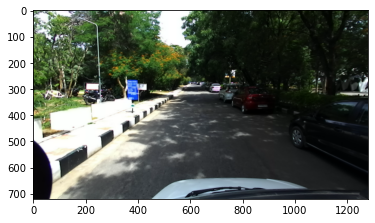

In [395]:
a = np.asarray(Image.open(image))
b = imgs[5]
plt.imshow(a)

In [396]:
b

array([[-24.28682137,  -4.72528505,   0.43187723,   3.        ,
          8.        ],
       [-14.29299545,  -2.77568841,   0.7630583 ,   1.        ,
          9.        ],
       [ -8.41883373,  -1.63035738,   0.75023663,   5.        ,
         10.        ],
       ...,
       [  2.48751736,   5.7565856 ,   1.44778502,  15.        ,
         14.        ],
       [  2.09810543,   4.8530798 ,  -0.09228832,   1.        ,
          7.        ],
       [  1.70333123,   3.93805504,   1.1496743 ,  25.        ,
         15.        ]])

# 数组方法

%%timeit
#数组方法
all = []
for ring in range(0,15):
    all1=[]
    for i in range(a.shape[0]):    
        if a[i,:][4] == ring: 
            all1.append(a[i,:])
    all.append(all1)
all

a[i,:]

#numpy方法
all = []
for ring in range(0,15):
    all1 = np.ndarray([])
    for i in range(a.shape[0]):    
        if a[i,:][4] == ring: 
            #all1.append(a[i,:])
            # 再试一下stack
            all1 = np.concatenate(a[i,:],all1,axis=1)
    # 环用数组组合
    all.append(all1)
all

all[1]

%%timeit
s=all[1][1]
x = s[0]
y = s[1]
theta = x/y
np.arctan(theta)

# 点云过滤

# 点云投影

IndexError: index 5 is out of bounds for axis 0 with size 5

0.03490658503988659

In [103]:
import mayavi.mlab

# 计数积分器

In [103]:
import mayavi.mlab